<a href="https://colab.research.google.com/github/JulieOnIsland/DeepLearningforAI_class_2022/blob/main/coding_with_MrChollet_ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary classification

Use imdb data

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print(train_data[0][:10])
print(len(train_data[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
218


In [4]:
print(train_labels[0])

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
# Decoding reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

1654784/1641221 [==============================] - 0s 0us/step


In [7]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    '''
    Encoding the integer sequences via multi-hot encoding
    a.k.a turn it into matrix that has (len(sequences), 10000) dimension
    '''
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j]=1
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
print(x_train[0])
print(x_train[0].shape)
print(x_train.shape)

[0. 1. 1. ... 0. 0. 0.]
(10000,)
(25000, 10000)


In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/5
30/30 [==============================] - 5s 46ms/step - loss: 0.5215 - acc: 0.7901 - val_loss: 0.4103 - val_acc: 0.8425
Epoch 2/5
30/30 [==============================] - 1s 23ms/step - loss: 0.3149 - acc: 0.9016 - val_loss: 0.3065 - val_acc: 0.8886
Epoch 3/5
30/30 [==============================] - 1s 20ms/step - loss: 0.2278 - acc: 0.9268 - val_loss: 0.2783 - val_acc: 0.8929
Epoch 4/5
30/30 [==============================] - 1s 24ms/step - loss: 0.1779 - acc: 0.9415 - val_loss: 0.2798 - val_acc: 0.8881
Epoch 5/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1436 - acc: 0.9547 - val_loss: 0.2845 - val_acc: 0.8857


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

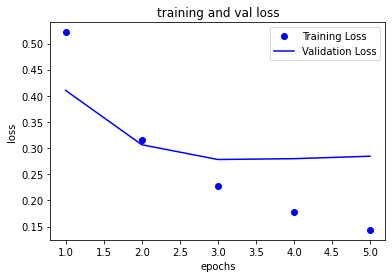

In [20]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

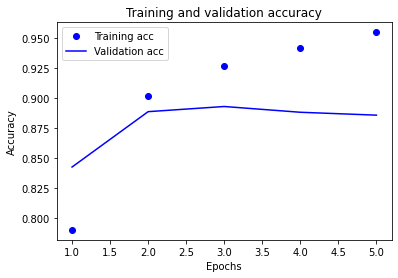

In [21]:
plt.clf()
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
preds = model.predict(x_test)

In [26]:
print(preds[:5])
print(preds.shape)

[[0.1564748 ]
 [0.9993242 ]
 [0.9002793 ]
 [0.559243  ]
 [0.91541946]]
(25000, 1)


In [28]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.3072 - acc: 0.8768


[0.30722713470458984, 0.8767600059509277]

## Multiclass classificaton

In [111]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [112]:
print('number of train data: ', len(train_data))
print('number of train label: ', len(train_labels))
print('number of test data: ', len(test_data))
print('number of test label: ', len(test_labels))

number of train data:  8982
number of train label:  8982
number of test data:  2246
number of test label:  2246


In [113]:
print(test_labels[:5])

[ 3 10  1  4  4]


In [114]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [115]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [116]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [117]:
print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


In [118]:
from tensorflow.keras.utils import to_categorical
# Make labels as one-hot encoded form and use 'categorical_crossentropy' as loss
# But we can just leave it and use 'sparse_categorical_crossentropy' as loss
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [119]:
print(y_train.shape)
print(y_test.shape)

(8982, 46)
(2246, 46)


In [120]:
print(train_labels[0])
print(y_train[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [121]:
multi_model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [122]:
multi_model.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['acc'])

In [129]:
multi_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                640064    
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [123]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [124]:
print(x_val.shape)
print(partial_x_train.shape)
print(y_val.shape)
print(partial_y_train.shape)

(1000, 10000)
(7982, 10000)
(1000, 46)
(7982, 46)


In [125]:
multi_history = multi_model.fit(partial_x_train,
                          partial_y_train,
                          epochs=5,
                          verbose=2,
                          batch_size=512,
                          validation_data=(x_val, y_val))

Epoch 1/5
16/16 - 1s - loss: 2.6722 - acc: 0.5388 - val_loss: 1.7880 - val_acc: 0.6400 - 1s/epoch - 71ms/step
Epoch 2/5
16/16 - 0s - loss: 1.4529 - acc: 0.7028 - val_loss: 1.3232 - val_acc: 0.7190 - 250ms/epoch - 16ms/step
Epoch 3/5
16/16 - 0s - loss: 1.0768 - acc: 0.7720 - val_loss: 1.1516 - val_acc: 0.7460 - 247ms/epoch - 15ms/step
Epoch 4/5
16/16 - 0s - loss: 0.8445 - acc: 0.8215 - val_loss: 1.0434 - val_acc: 0.7870 - 255ms/epoch - 16ms/step
Epoch 5/5
16/16 - 0s - loss: 0.6692 - acc: 0.8587 - val_loss: 0.9740 - val_acc: 0.8010 - 234ms/epoch - 15ms/step


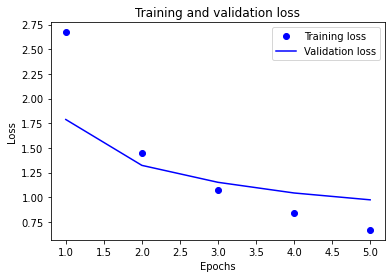

In [127]:
loss = multi_history.history["loss"]
val_loss = multi_history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

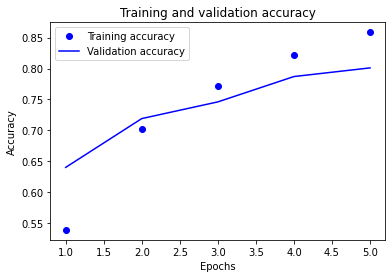

In [128]:
plt.clf()
acc = multi_history.history["acc"]
val_acc = multi_history.history["val_acc"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [131]:
results = multi_model.evaluate(x_test, y_test)
results

71/71 [==============================] - 0s 6ms/step - loss: 1.0514 - acc: 0.7631


[1.0513660907745361, 0.7631344795227051]

In [136]:
preds = multi_model.predict(x_test)

In [137]:
preds.shape

(2246, 46)

In [142]:
print(preds[0])
print(len(preds[0]))
print(np.sum(preds[0]))
print(np.argmax(preds[0]))

[1.03963430e-04 7.91425584e-04 9.14650518e-05 6.07645333e-01
 3.76960009e-01 3.91208923e-05 2.84736918e-04 2.11976694e-05
 2.67096958e-03 7.11547691e-05 9.78521784e-05 8.18134693e-04
 5.41018162e-05 1.05568196e-03 2.85096117e-04 2.08310721e-05
 3.15561052e-03 2.31993574e-04 8.27113327e-05 5.57250169e-04
 4.96667402e-04 1.21624430e-03 2.85404476e-05 1.22641941e-04
 5.84755289e-05 2.22211645e-04 5.12316547e-05 8.41980946e-05
 5.80924425e-05 2.87820614e-04 1.92377483e-04 7.55030487e-05
 8.56714541e-05 9.03327527e-05 1.43129855e-05 5.25791402e-05
 4.19791962e-04 1.63509631e-05 4.03726481e-05 9.88230458e-04
 9.57081738e-06 2.00500101e-04 1.01900741e-05 1.58486819e-05
 8.73130648e-06 1.14842405e-04]
46
1.0
3


## Regression

In [143]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [145]:
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [152]:
for i in range(3):
    print(f'train data No.{i} \n {train_data[i]}')
    print(f'Price: {train_targets[i]}')

train data No.0 
 [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Price: 15.2
train data No.1 
 [2.1770e-02 8.2500e+01 2.0300e+00 0.0000e+00 4.1500e-01 7.6100e+00
 1.5700e+01 6.2700e+00 2.0000e+00 3.4800e+02 1.4700e+01 3.9538e+02
 3.1100e+00]
Price: 42.3
train data No.2 
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
 1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
 3.26000e+00]
Price: 50.0


In [156]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

In [157]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [158]:
len(train_data)

404

In [159]:
# K-fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=32, verbose=2)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=2)
    all_scores.append(val_mae)

Processing fold #0
Epoch 1/100
10/10 - 1s - loss: 561.1290 - mae: 21.9358 - 777ms/epoch - 78ms/step
Epoch 2/100
10/10 - 0s - loss: 485.4208 - mae: 20.2132 - 39ms/epoch - 4ms/step
Epoch 3/100
10/10 - 0s - loss: 407.8231 - mae: 18.3489 - 37ms/epoch - 4ms/step
Epoch 4/100
10/10 - 0s - loss: 329.1550 - mae: 16.2345 - 41ms/epoch - 4ms/step
Epoch 5/100
10/10 - 0s - loss: 253.2776 - mae: 13.9010 - 37ms/epoch - 4ms/step
Epoch 6/100
10/10 - 0s - loss: 183.6062 - mae: 11.4106 - 36ms/epoch - 4ms/step
Epoch 7/100
10/10 - 0s - loss: 127.5641 - mae: 9.2220 - 39ms/epoch - 4ms/step
Epoch 8/100
10/10 - 0s - loss: 90.2013 - mae: 7.5493 - 45ms/epoch - 4ms/step
Epoch 9/100
10/10 - 0s - loss: 67.7876 - mae: 6.4508 - 39ms/epoch - 4ms/step
Epoch 10/100
10/10 - 0s - loss: 53.0240 - mae: 5.6410 - 39ms/epoch - 4ms/step
Epoch 11/100
10/10 - 0s - loss: 43.4054 - mae: 5.0236 - 41ms/epoch - 4ms/step
Epoch 12/100
10/10 - 0s - loss: 36.7835 - mae: 4.5180 - 41ms/epoch - 4ms/step
Epoch 13/100
10/10 - 0s - loss: 32.3067

In [160]:
all_scores

[1.9561474323272705,
 2.6395435333251953,
 2.7865421772003174,
 2.4043564796447754]

In [161]:
np.mean(all_scores)

2.4466474056243896

In [162]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=10, batch_size=32, verbose=2)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/10
13/13 - 1s - loss: 537.6948 - mae: 21.3482 - 1s/epoch - 86ms/step
Epoch 2/10
13/13 - 0s - loss: 452.4908 - mae: 19.3629 - 46ms/epoch - 4ms/step
Epoch 3/10
13/13 - 0s - loss: 362.4708 - mae: 17.0410 - 46ms/epoch - 4ms/step
Epoch 4/10
13/13 - 0s - loss: 264.5793 - mae: 14.1580 - 48ms/epoch - 4ms/step
Epoch 5/10
13/13 - 0s - loss: 174.3870 - mae: 10.8968 - 49ms/epoch - 4ms/step
Epoch 6/10
13/13 - 0s - loss: 112.5699 - mae: 8.3064 - 71ms/epoch - 5ms/step
Epoch 7/10
13/13 - 0s - loss: 76.8149 - mae: 6.7590 - 46ms/epoch - 4ms/step
Epoch 8/10
13/13 - 0s - loss: 55.2392 - mae: 5.6467 - 47ms/epoch - 4ms/step
Epoch 9/10
13/13 - 0s - loss: 42.1877 - mae: 4.8828 - 48ms/epoch - 4ms/step
Epoch 10/10
13/13 - 0s - loss: 33.8257 - mae: 4.2965 - 46ms/epoch - 4ms/step
4/4 [==============================] - 0s 4ms/step - loss: 31.6916 - mae: 4.4534


In [163]:
test_mae_score

4.453360080718994

In [168]:
preds = model.predict(test_data)
print(preds[8])
print(test_targets[8])

[17.263218]
20.5
